In [4]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize
import networkx as nx
import os
from sklearn import svm
import sklearn.metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy import stats
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.isotonic import  IsotonicRegression
from sklearn.tree import *
from sklearn.ensemble import *

import math
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

np.random.seed(42)
%matplotlib inline

C:\Users\keipa\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


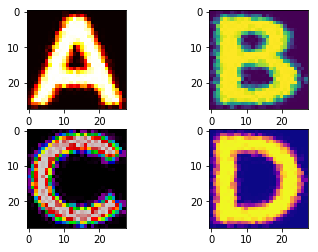

In [5]:
# task 1
# Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;

imgA = mpimg.imread('notMNIST_small/A/MDEtMDEtMDAudHRm.png')
imgB = mpimg.imread('notMNIST_small/B/MDEtMDEtMDAudHRm.png')
imgC = mpimg.imread('notMNIST_small/C/MDEtMDEtMDAudHRm.png')
imgD = mpimg.imread('notMNIST_small/D/MDEtMDEtMDAudHRm.png')

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imgA, cmap="hot")
axarr[0,1].imshow(imgB)
axarr[1,0].imshow(imgC, cmap="nipy_spectral")
axarr[1,1].imshow(imgD, cmap='plasma')

In [6]:
# task 2
# Проверьте, что классы являются сбалансированными,
#т.е. количество изображений, принадлежащих каждому из классов,
# примерно одинаково (В данной задаче 10 классов).

# check small dataset
# check big dataset
import os, os.path

def dataset_analyse(path):
    classes = [x[0] for x in os.walk(path)][1:]
    print(path)
    for _class in classes:
        path, dirs, files = next(os.walk(_class))
        print(_class.split("\\")[1], len(files))

dataset_analyse("notMNIST_small")
dataset_analyse("notMNIST_large")

notMNIST_small
('A', 1873)
('B', 1873)
('C', 1873)
('D', 1873)
('E', 1873)
('F', 1873)
('G', 1872)
('H', 1872)
('I', 1872)
('J', 1872)
notMNIST_large
('A', 52912)
('B', 52912)
('C', 52912)
('D', 52912)
('E', 52912)
('F', 52912)
('G', 52912)
('H', 52912)
('I', 52912)
('J', 52911)


In [7]:
# task 3
# Разделите данные на три подвыборки: 
# обучающую (200 тыс. изображений),
# валидационную (10 тыс. изображений)
# и контрольную (тестовую) (19 тыс. изображений);
def split_dataset(dataset):
    learn_dataset = dataset[0:200000]
    print(len(learn_dataset))
    validation_dataset = dataset[200000:210000]
    print(len(validation_dataset))
    test_dataset = dataset[210000:229000]
    print(len(test_dataset))
    return learn_dataset,validation_dataset,test_dataset

def randomize_list(dataset):
    from random import shuffle
    shuffle(dataset)
    return dataset

from tqdm import tqdm
import hashlib
def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def get_all_files_recursively(path):
    return [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames]

def remove_dublicates(dataset):
    dublicate_remover = dict()
    for file in dataset:
        dublicate_remover[md5(file)] = file
    return dublicate_remover.values()

dataset = get_all_files_recursively("notMNIST_large")
print(len(dataset))
# task 4

# Проверьте, что данные из обучающей выборки не пересекаются 
# с данными из валидационной и контрольной выборок. 
# Другими словами, избавьтесь от дубликатов в обучающей выборке.
dataset = remove_dublicates(dataset)
print(len(dataset))
dataset = randomize_list(dataset)
learn_dataset,validation_dataset,test_dataset = split_dataset(dataset)

529119
461955
200000
10000
19000


In [8]:
from sklearn.linear_model import LogisticRegression
# from tqdm.notebook import tqdm
import numpy as np
from PIL import Image

alphabet = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9}

def Learn(X_train, y_train, X_test, y_test):
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    predicted = clf.predict(X_test)
    score = clf.score(X_test, y_test) 
    print(score)
    return score

def GetClassData(path):
    return alphabet[path.split("\\")[1]]


def GetLearnData(learn_dataset, test_dataset, train_len):
    X_train, y_train, X_test, y_test = [],[],[],[] 
    for index in tqdm(range(train_len)):
        path = learn_dataset[index]
        img = Image.open(path)
        arr = np.array(img)
        shape = arr.shape
        flat_arr = arr.ravel()
        X_train.append(flat_arr)
        y_train.append(GetClassData(path))
    for path in tqdm(test_dataset):
        img = Image.open(path)
        arr = np.array(img)
        shape = arr.shape
        flat_arr = arr.ravel()
        X_test.append(flat_arr)
        y_test.append(GetClassData(path))
    return X_train, y_train, X_test, y_test

probes = [50, 100, 1000, 50000]
scores = []
for probe in probes:
    X_train, y_train, X_test, y_test = GetLearnData(learn_dataset, test_dataset, probe)
    scores.append(Learn(X_train, y_train, X_test, y_test))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19000/19000 [00:09<00:00, 1907.25it/s]


0.5352631578947369


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19000/19000 [00:10<00:00, 1886.61it/s]


0.6625263157894736


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19000/19000 [00:10<00:00, 1806.26it/s]


0.7252105263157895


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19000/19000 [00:09<00:00, 2033.17it/s]


0.8068421052631579


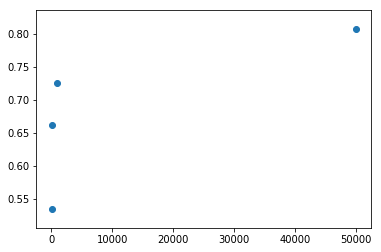

In [11]:
# task 5
# Постройте простейший классификатор (например, с помощью логистической регрессии). 
# Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). 
# Для построения классификатора можете использовать библиотеку SkLearn
import matplotlib.pyplot as plt
plt.scatter(probes, scores)
plt.show()